<a href="https://colab.research.google.com/github/r0cd7b/DSAC/blob/master/Lab3_Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Classification


*   Iris Dataset
*   One-hot Encoding
*   Softmax
*   Cross Entropy(Multi-Class)





In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X, y = iris_data.values[:, :4].astype("float32"), iris_data.values[:, 4]

y_pre = LabelEncoder().fit_transform(y)
y = np_utils.to_categorical(y_pre)
X[:3], y[:3], y[-3:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]], dtype=float32), array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32), array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((120, 4), (120, 3))

In [4]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
model.save("iris_model.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
del model
model = load_model("iris_model.h5")
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.9667


[0.16801662743091583, 0.9666666388511658]

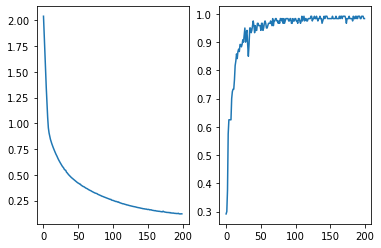

In [6]:
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])

# K-Fold Validation

In [7]:
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(16, input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in skf.split(X, y_pre):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y_pre[train_index], y_pre[test_index]
  y_train_ohe = np_utils.to_categorical(y_train)
  y_test_ohe = np_utils.to_categorical(y_test)

  model.fit(X_train, y_train_ohe, epochs=50, batch_size=10, verbose=0)
  model.evaluate(X_test, y_test_ohe)
  # score = model.evaluate(X_test, y_test_ohe)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9333


# Callback - checkpoint and early stoping

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

df = pd.read_csv("wine.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
df.values

array([[ 7.4 ,  0.7 ,  0.  , ...,  9.4 ,  5.  ,  1.  ],
       [ 7.8 ,  0.88,  0.  , ...,  9.8 ,  5.  ,  1.  ],
       [ 7.8 ,  0.76,  0.04, ...,  9.8 ,  5.  ,  1.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  9.4 ,  6.  ,  0.  ],
       [ 5.5 ,  0.29,  0.3 , ..., 12.8 ,  7.  ,  0.  ],
       [ 6.  ,  0.21,  0.38, ..., 11.8 ,  6.  ,  0.  ]])

In [10]:
X, y = df.values[:, :12], df.values[:, 12]

In [11]:
model = Sequential()
model.add(Dense(30, input_shape=(12,), activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

# create directory to store model information
MODEL_DIR = "./model"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

history = model.fit(X, y, validation_split=0.2, epochs=2000, batch_size=100, verbose=0, callbacks=[checkpointer, early_stopping_callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.13800, saving model to ./model/01-0.1380.hdf5

Epoch 00002: val_loss improved from 0.13800 to 0.11400, saving model to ./model/02-0.1140.hdf5

Epoch 00003: val_loss did not improve from 0.11400

Epoch 00004: 

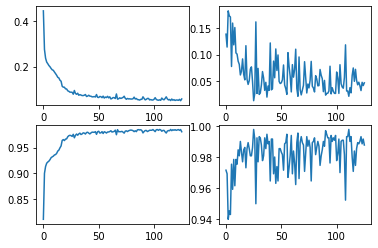

In [13]:
y_loss, y_vloss = history.history["loss"], history.history["val_loss"]
y_accuracy, y_vacc = history.history["accuracy"], history.history["val_accuracy"]

plt.subplot(2, 2, 1)
plt.plot(y_loss)
plt.subplot(2, 2, 2)
plt.plot(y_vloss)
plt.subplot(2, 2, 3)
plt.plot(y_accuracy)
plt.subplot(2, 2, 4)
plt.plot(y_vacc)